1. Traitement des données

In [ ]:
# importer les bibliothèques
import pandas as pd
import datetime as dt
import re
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Chargement des données
from google.colab import files
uploaded = files.upload()

Saving scrubbed.csv to scrubbed.csv


In [ ]:
# Lecture des données
pd.set_option('display.max_columns', 500)
cols = ['datetime','city','state','country','shape','seconds',
              'minutes','comments','date added','latitude','longtitude']

# chargement du jeu de données non nettoyé et attribuer des noms de colonnes
df = pd.read_csv('scrubbed.csv', sep=',',names =cols)
df = df.drop(0, axis=0)
df.sample(n=10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,seconds,minutes,comments,date added,latitude,longtitude
17481,12/1/2007 15:00,mayville,ny,us,teardrop,85,85 seconds,A tear shape object dancing in the air.,3/4/2008,42.2538889,-79.5047222
55322,7/1/1992 15:00,andover,ks,us,cigar,180,3 min.,cigar shape&#44 south central kansas 1992 or 1993,8/5/2001,37.7138889,-97.1361111
56380,7/14/2012 21:00,aurora,co,us,oval,300,<5 minutes,UFO spotted in SE skies this past summer.,11/19/2012,39.7294444,-104.8313889
16780,1/20/2009 05:00,marathon,fl,us,circle,300,5 minutes,Two cluster of lights stationary in sky 45 deg...,3/19/2009,24.7133333,-81.0905556
12858,11/25/1958 23:00,milwaukee,wi,us,disk,10,10 seconds,3 disk shaped lights swerving among each other...,12/12/2011,43.0388889,-87.9063889
69590,8/25/2009 21:31,carmichael,ca,us,light,35,35 seconds,Saw three star-like objects moving through the...,8/27/2009,38.6172,-121.327
52603,6/30/1952 18:30,auburn,wa,us,oval,60,1 minute,Early nighttime sighting of huge oval object f...,2/14/2006,47.3075000,-122.2272222
42402,5/15/1993 20:00,london (uk/england),NaN,gb,other,2700,45.min,ufo sighted near alexandra palice north london,4/8/2002,51.514125,-.093689
51408,6/24/1984 21:00,tallahassee,fl,us,unknown,10800,3 hrs,FLASH CAR DIED AND I T WAS 4 HRS LATER,6/12/2002,30.4380556,-84.2808333
43447,5/20/2010 11:00,south kingstown,ri,NaN,chevron,300,5 minutes,Odd chemtrail and jet formation over souther R...,6/3/2010,41.447569,-71.524667


In [ ]:
df.describe()

,datetime,city,state,country,shape,seconds,minutes,comments,date added,latitude,longtitude
count,80332,80332,74535,70662,78400,80332,80332,80317,80332,80332,80332
unique,69586,19900,67,5,29,706,8349,79997,317,23312,24389
top,7/4/2010 22:00,seattle,ca,us,light,300,5 minutes,Fireball,12/12/2009,47.6063889,-122.3308333
freq,36,525,9655,65114,16565,7070,4716,11,1510,481,481


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80332 entries, 1 to 80332
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    80332 non-null  object
 1   city        80332 non-null  object
 2   state       74535 non-null  object
 3   country     70662 non-null  object
 4   shape       78400 non-null  object
 5   seconds     80332 non-null  object
 6   minutes     80332 non-null  object
 7   comments    80317 non-null  object
 8   date added  80332 non-null  object
 9   latitude    80332 non-null  object
 10  longtitude  80332 non-null  object
dtypes: object(11)
memory usage: 7.4+ MB


In [ ]:
df.isna().sum()

datetime         0
city             0
state         5797
country       9670
shape         1932
seconds          0
minutes          0
comments        15
date added       0
latitude         0
longtitude       0
dtype: int64

In [ ]:
#Utiliser Fillna pour imputer `` non spécifié '' à la place des valeurs NaN, 
#traitera plus tard les colonnes numériques classées comme `` objet ''
df = df.fillna('unspecified')
df.shape

(80332, 11)

In [ ]:
# Extraction de la date et de l'heure de la colonne datetime dans les colonnes sighting_date (Datetime64) et time (int
df['sighting_date'] = df['datetime'].str.findall(r'\d{1,2}.\d{1,2}.\d{1,4}').str.join('')
df['time'] = df['datetime'].str.findall(r'\s\d{1,2}.\d{1,2}').str.join('').str.replace(':', '')
df['sighting_date'] = pd.to_datetime(df['sighting_date'])
df['time'] = df['time'].astype(int)
df.sample(n=100)



,datetime,city,state,country,shape,seconds,minutes,comments,date added,latitude,longtitude,sighting_date,time
32804,3/21/2014 21:10,parsippany,nj,us,triangle,5,5 seconds,It is a very clear night here in New Jersey. I...,3/27/2014,40.8577778,-74.4263889,2014-03-21,2110
2814,10/18/2010 07:30,honeoye falls,ny,us,unspecified,10,10 seconds,A possible disk shaped object is seen over Hon...,11/21/2010,42.9522222,-77.5905556,2010-10-18,730
15725,1/17/2008 05:00,new providence,nj,us,unknown,300,3-5 min,NJ 5 am 1/17/08 UFO Long&#44 Low Flying&#44 2...,1/21/2008,40.6983333,-74.4019444,2008-01-17,500
63943,7/9/2003 14:15,richmond (canada),pq,ca,cigar,120,2 min,Daylight sighting of a white&#44 cigar shaped ...,7/16/2003,45.666667,-72.15,2003-07-09,1415
8966,11/13/2009 23:15,vancouver (canada),bc,ca,fireball,15,15 secounds,Three green Obs observed over Vancouver Friday...,12/12/2009,49.25,-123.133333,2009-11-13,2315
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55145,7/1/1965 22:00,new orleans,la,us,unknown,60,60 seconds,Spec of light in sky changes course around ano...,6/12/2008,29.9544444,-90.0750000,1965-07-01,2200
46764,6/11/2005 19:00,london (mad mile rd.&#44 addington) (uk/england),unspecified,gb,circle,1800,30 mins,V.fast &amp;bright white &amp; red lights. 4 d...,11/8/2005,51.514125,-.093689,2005-06-11,1900
21963,12/3/2006 17:00,lancaster,ky,us,cigar,60,less than 1 min.,I witnessed the exact same object as the guy f...,12/14/2006,37.6194444,-84.5780556,2006-12-03,1700
36440,4/13/2000 22:30,eugene,or,us,sphere,240,4 minutes,Yellow to Golden Orange object moving over cen...,4/26/2000,44.0522222,-123.0855556,2000-04-13,2230


In [ ]:
# Conversion de colonnes lat longues en float
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longtitude'] = pd.to_numeric(df['longtitude'], errors='coerce')

In [ ]:
# Suppression des fautes de ligne et de la chaîne Fillna de plus tôt
df['seconds'] = df['seconds'].str.replace('8/16/2002 01:30', '0.0')
df['seconds'] = df['seconds'].str.replace('`','')
df['seconds'] = df['seconds'].str.replace('NaN', '0.0')
df['seconds'] = df['seconds'].str.replace('unspecified', '0.0')

In [ ]:
# Mise à jour de toutes les observations de 0 seconde à la médiane (120 secondes)
df['seconds'] = df['seconds'].str.replace('0.0', '120')
df['seconds'] = df['seconds'].str.replace(r'^0', '120', regex=True)


# Conversion de secondes en float
df['seconds'] = df['seconds'].astype(float)


# Mise à jour de la colonne des minutes avec la conversion des secondes 
#(plus facile à interpréter / foprmat acceptable pour la modélisation)
df['minutes'] = df['seconds'] / 60

In [ ]:
df.sample(n=5)

,datetime,city,state,country,shape,seconds,minutes,comments,date added,latitude,longtitude,sighting_date,time
10805,11/19/2013 19:30,flowery branch,ga,us,triangle,1800.0,30.00,Looked like the sail of a sail boat with light...,11/20/2013,34.185000,-83.925278,2013-11-19,1930
32110,3/17/2012 19:57,tinley park,il,us,changing,180.0,3.00,Quick moving glowing orange object that change...,4/18/2012,41.573333,-87.784444,2012-03-17,1957
52744,6/30/1975 00:00,greenwich,ct,us,sphere,30.0,0.50,this was a long time ago about 1974-1976 dont ...,2/14/2008,41.026389,-73.628889,1975-06-30,0
24967,1/6/2013 21:15,reading/ruscombmanor township,pa,unspecified,light,15.0,0.25,Reader saw 6-8 orange lights in northern sky m...,2/4/2013,40.425100,-75.818042,2013-01-06,2115
21566,12/31/2008 23:55,katy,tx,us,light,240.0,4.00,Orange light over Katy&#44 TX seen 12/31/08,1/10/2009,29.785556,-95.824167,2008-12-31,2355


In [ ]:
# Vérifiez la variance de la colonne des minutes
print('Minutes Variance =',df['minutes'].var())

Minutes Variance = 99931724.65707777


In [ ]:
# Log normalise la colonne des minutes pour réduire la variance
df["minutes_log"] = np.log(df['minutes'])

# Imprimez la variance de la colonne seconds_log
print('Log Transformed Minutes Variance =',df['minutes_log'].var())

Log Transformed Minutes Variance = 4.739148181702847


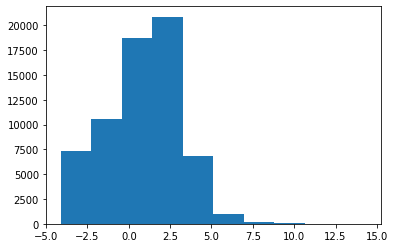

Max Minutes Log: 14.304459829752572


In [ ]:
# Print la variance de la colonne seconds_log
plt.hist(df['minutes_log'], bins=10)
#plt.xticks(np.arange(-5, 17.5, 2.5))
plt.show()
print('Max Minutes Log:', df['minutes_log'].max() )

In [ ]:
# Extraction month et le nom du mois de la colonne mois
df["month"] = df["sighting_date"].apply(lambda x: x.month)
df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

# Extraction year de la colonne date
df["year"] = df["sighting_date"].apply(lambda x: x.year)

# Toutes les 3 colonnes
print(df[['sighting_date', 'month', 'month_name', 'year']].head(3))

  sighting_date  month month_name  year
1    1949-10-10     10    October  1949
2    1949-10-10     10    October  1949
3    1955-10-10     10    October  1955


In [ ]:
df.head(5)

,datetime,city,state,country,shape,seconds,minutes,comments,date added,latitude,longtitude,sighting_date,time,minutes_log,month,month_name,year
1,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45.000000,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949-10-10,2030,3.806662,10,October,1949
2,10/10/1949 21:00,lackland afb,tx,unspecified,light,7200.0,120.000000,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,1949-10-10,2100,4.787492,10,October,1949
3,10/10/1955 17:00,chester (uk/england),unspecified,gb,circle,20.0,0.333333,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,1955-10-10,1700,-1.098612,10,October,1955
4,10/10/1956 21:00,edna,tx,us,circle,20.0,0.333333,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956-10-10,2100,-1.098612,10,October,1956
5,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15.000000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960-10-10,2000,2.708050,10,October,1960


In [ ]:
# Il manque bcp de valeur dans la colonne countries , qui était remplies par 'Unspecified'
df['country'].value_counts()

us             65114
unspecified     9670
ca              3000
gb              1905
au               538
de               105
Name: country, dtype: int64

In [ ]:
# Il y a moins de valeurs manquantes de la colonne State
df['state'].value_counts()

ca             9655
unspecified    5797
wa             4268
fl             4200
tx             3677
               ... 
nf               25
nt               20
pe               17
yt               13
yk                7
Name: state, Length: 68, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80332 entries, 1 to 80332
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       80332 non-null  object        
 1   city           80332 non-null  object        
 2   state          80332 non-null  object        
 3   country        80332 non-null  object        
 4   shape          80332 non-null  object        
 5   seconds        65535 non-null  float64       
 6   minutes        65535 non-null  float64       
 7   comments       80332 non-null  object        
 8   date added     80332 non-null  object        
 9   latitude       80331 non-null  float64       
 10  longtitude     80332 non-null  float64       
 11  sighting_date  80332 non-null  datetime64[ns]
 12  time           80332 non-null  int64         
 13  minutes_log    65535 non-null  float64       
 14  month          80332 non-null  int64         
 15  month_name     8033

In [ ]:
# Définition des limites de la région avec les coordonnées Google Maps.
# Ce sont des continents / régions étendus et seront ajoutés à la colonne `` Countries ''
conditions = [ 
#aus
(df['latitude'] > -48.0) & (df['latitude'] <-7.0) & (df['longtitude'] > -171.0) & (df['latitude'] < 104.0)
    & (df['latitude'] != -0) & (df['longtitude'] != -0), 
#africa                                                                                        
(df['latitude'] > -37.0) & (df['latitude'] <37.0) & (df['longtitude'] > -26.0) & (df['latitude'] < 48.0)
    & (df['latitude'] != -0) & (df['longtitude'] != -0),
#mideast
(df['latitude'] >10.0) & (df['latitude'] <47.0) & (df['longtitude'] > 35.0) & (df['latitude'] < 90.0)
    & (df['latitude'] != 0) & (df['longtitude'] != 0),
#latam
(df['latitude'] >-59.0) & (df['latitude'] <30.0) & (df['longtitude'] < -29.0) & (df['latitude'] >-126.0)
    & (df['latitude'] != -0) & (df['longtitude'] != -0)]
categories = ['aus-nz', 'africa', 'mideast', 'latam']

df['added_countries'] = np.select(conditions, categories)
df['added_countries'] = df['added_countries'].str.replace('0','')
df['country'] = df['country'] + df['added_countries']
df['added_countries'].value_counts()

           72570
latam       5779
aus-nz      1042
africa       895
mideast       46
Name: added_countries, dtype: int64

In [ ]:
df.sample(n=5)

,datetime,city,state,country,shape,seconds,minutes,comments,date added,latitude,longtitude,sighting_date,time,minutes_log,month,month_name,year,added_countries
27059,2/17/2004 21:00,howell,mi,us,disk,360.0,6.000000,floating above my feild,3/2/2004,42.607222,-83.929444,2004-02-17,2100,1.791759,2,February,2004,
27637,2/20/2014 22:00,porterville,ca,us,disk,900.0,15.000000,Bright orange lights turn into slow moving sau...,2/27/2014,36.065278,-119.015833,2014-02-20,2200,2.708050,2,February,2014,
52845,6/30/1986 12:00,jonesboro,ar,us,disk,30.0,0.500000,disk shape ufo up close I saw every detail of ...,12/12/2009,35.842222,-90.704167,1986-06-30,1200,-0.693147,6,June,1986,
56179,7/13/2013 23:00,plano,tx,us,sphere,300.0,5.000000,Yellow sphere observed by two people sitting s...,10/23/2013,33.019722,-96.698611,2013-07-13,2300,1.609438,7,July,2013,
9832,11/16/1999 19:05,hudson,oh,us,other,20.0,0.333333,looking out of window I saw a huge long light ...,11/17/1999,41.240000,-81.440833,1999-11-16,1905,-1.098612,11,November,1999,


In [ ]:
df = df.drop('added_countries', axis=1)

In [ ]:
# Mapping de nouvelles régions et combinaison avec des régions existantes
df['country'] = df['country'].map({'unspecifiedafrica':'africa', 'unspecifiedlatam ': 'latam',
                                  'unspecifiedaus-nz':'aus-nz', 'auaus-nz': 'aus-nz', "au":'aus-nz',
                                  'unspecifiedmideast':'mideast', 'uslatam': 'latam', 'gb':'uk-irl',
                                  'ca':'ca', 'de':'de', 'us':'us', 'unspecified':'unspecified'})

df['country'] = df['country'].fillna('unspecified')
df['country'].value_counts()

us             60240
unspecified     8225
latam           4874
ca              3000
uk-irl          1905
aus-nz          1042
africa           895
de               105
mideast           46
Name: country, dtype: int64

In [ ]:
# Label Encoding The Country/Regions
le = LabelEncoder()

x = le.fit_transform(df['country'])

df['country_enc'] = x

In [ ]:
df['country_enc'].value_counts()

8    60240
7     8225
4     4874
2     3000
6     1905
1     1042
0      895
3      105
5       46
Name: country_enc, dtype: int64

In [ ]:
df['state']

1                 tx
2                 tx
3        unspecified
4                 tx
5                 hi
            ...     
80328             tn
80329             id
80330             ca
80331             va
80332             ok
Name: state, Length: 80332, dtype: object

In [ ]:
# Label Encoding The States
le = LabelEncoder()

y = le.fit_transform(df['state'])

df['state_enc'] = y

In [ ]:
df['state_enc'].value_counts()

6     9655
58    5797
62    4268
11    4200
57    3677
      ... 
34      25
39      20
47      17
67      13
66       7
Name: state_enc, Length: 68, dtype: int64

In [ ]:
# Chargement des données (le dossier country)
from google.colab import files
uploaded = files.upload()

Saving countries to countries


In [ ]:
# Extraction de City à partir d'une chaîne copiée que j'ai copiée à partir de Google
with open('countries') as f:
    lines = f.readlines()
lines = [x.strip() for x in lines]
lines = [x.lower() for x in lines]
lines[:2]

['afghanistan', 'albania']

In [ ]:
# Extraire la liste et remplir NaNs avec' Unspecified '
df['added_region'] = df['city'].str.findall(f'({"|".join(lines)})')
df['added_region'] = df['city'].str.extract(f'({"|".join(lines)})')
df['added_region'] = df['added_region'].fillna('unspecified')
df['added_region'].value_counts()

unspecified        73102
canada              3589
australia            634
india                440
mexico               275
                   ...  
san marino             1
ghana                  1
tonga                  1
solomon islands        1
tanzania               1
Name: added_region, Length: 134, dtype: int64

In [ ]:
# Label Encoding The Added Cities
le = LabelEncoder()

x = le.fit_transform(df['added_region'])

df['city_enc'] = x

In [ ]:
df.sample(n=3)

,datetime,city,state,country,shape,seconds,minutes,comments,date added,latitude,longtitude,sighting_date,time,minutes_log,month,month_name,year,country_enc,state_enc,added_region,city_enc
40924,4/8/2012 21:40,seattle,wa,us,fireball,60.0,1.000000,Silent moved from west to southeast across the...,4/18/2012,47.606389,-122.330833,2012-04-08,2140,0.000000,4,April,2012,8,62,unspecified,128
47404,6/1/1986 19:00,new york city (brooklyn),ny,us,triangle,180.0,3.000000,looking at night sky a large spaceship the si...,1/3/2001,40.714167,-74.006389,1986-06-01,1900,1.098612,6,June,1986,8,41,unspecified,128
35464,3/9/2000 20:30,timbo (approx. 7 miles west of),ar,us,sphere,11.0,0.183333,My Sister&amp; I Were driving north on a dirt ...,3/16/2000,35.870833,-92.316944,2000-03-09,2030,-1.696449,3,March,2000,8,3,unspecified,128


In [ ]:
# Creation de la colonne Time à partir de la colonne "sighting_time"
df.loc[(df['time'] >=600) & (df['time'] <= 1200), 'sighting_time'] = 'morning'+'\n'+'(6am-12pm)'
df.loc[(df['time'] >=1200) & (df['time'] <=  1600), 'sighting_time'] = 'afternoon'+'\n'+'(12pm-4pm)'
df.loc[(df['time'] >=1600) & (df['time'] <=  2100), 'sighting_time'] = 'evening'+'\n'+'(4pm-9pm)'
df.loc[(df['time'] >=2100) & (df['time'] <=  2400), 'sighting_time'] = 'nighttime'+'\n'+'(9pm-12am)'
df.loc[(df['time'] >=0) & (df['time'] <=  600), 'sighting_time'] = 'latenight'+'\n'+'(12am-6am)'

In [ ]:
# Encoding sighting_time 
def sighting(val):
    if val == 'morning'+'\n'+'(6am-12pm)':
        return 1
    elif val == 'afternoon'+'\n'+'(12pm-4pm)':
        return 2
    elif val =='evening'+'\n'+'(4pm-9pm)':
        return 3
    elif val== 'nighttime'+'\n'+'(9pm-12am)':
        return 4
    else:
        return 5

df['sighting_time_enc'] = df['sighting_time'].apply(sighting)

In [ ]:
df.head(3)

,datetime,city,state,country,shape,seconds,minutes,comments,date added,latitude,longtitude,sighting_date,time,minutes_log,month,month_name,year,country_enc,state_enc,added_region,city_enc,sighting_time,sighting_time_enc
1,10/10/1949 20:30,san marcos,tx,latam,cylinder,2700.0,45.000000,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949-10-10,2030,3.806662,10,October,1949,4,57,unspecified,128,evening\n(4pm-9pm),3
2,10/10/1949 21:00,lackland afb,tx,unspecified,light,7200.0,120.000000,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,1949-10-10,2100,4.787492,10,October,1949,7,57,unspecified,128,nighttime\n(9pm-12am),4
3,10/10/1955 17:00,chester (uk/england),unspecified,uk-irl,circle,20.0,0.333333,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,1955-10-10,1700,-1.098612,10,October,1955,6,58,unspecified,128,evening\n(4pm-9pm),3


In [ ]:
# Calcul de forme unique
print(df['shape'].value_counts())
# Nombre de forme
print('\n'+'Number Of Shapes =', len(df['shape'].unique()))

light          16565
triangle        7865
circle          7608
fireball        6208
other           5649
unknown         5584
sphere          5387
disk            5213
oval            3733
formation       2457
cigar           2057
changing        1962
unspecified     1932
flash           1328
rectangle       1297
cylinder        1283
diamond         1178
chevron          952
egg              759
teardrop         750
cone             316
cross            233
delta              7
crescent           2
round              2
flare              1
pyramid            1
hexagon            1
changed            1
dome               1
Name: shape, dtype: int64

Number Of Shapes = 30


In [ ]:
# OHE the ufo shapes
shape_set = pd.get_dummies(df['shape'])

# Concatenating OHE Values to the df 
df = pd.concat([df, shape_set], axis=1)
df.shape

(80332, 53)

In [ ]:
# Changer le style de plotting
sns.set(style="white", context="talk")

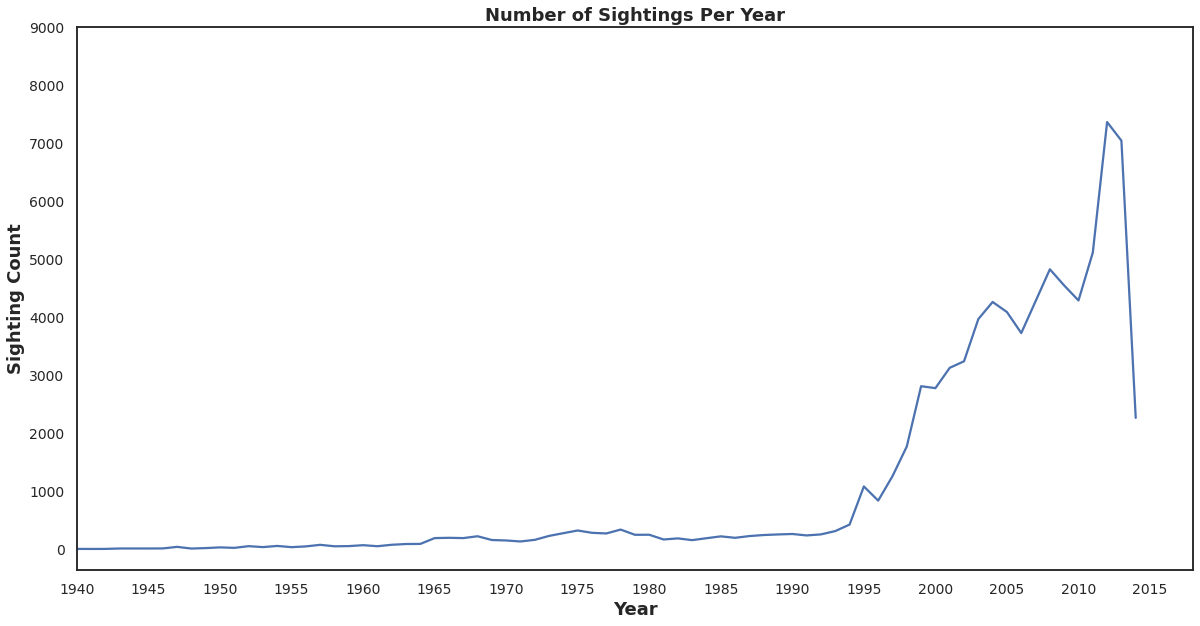

In [ ]:
# Nombre de sightings par année (à partir de 1940)
plt.figure(figsize=(20,10))

sns.lineplot(data=df['year'].value_counts())

plt.xlim(1940, 2018)
plt.xticks(range(1940,2020, 5), rotation=0, size=14)
plt.yticks(range(0,10000, 1000), rotation=0, size=14)

plt.xlabel('Year', fontweight='semibold')
plt.ylabel('Sighting Count', fontweight='semibold')
plt.title('Number of Sightings Per Year', fontweight='semibold')
plt.show()

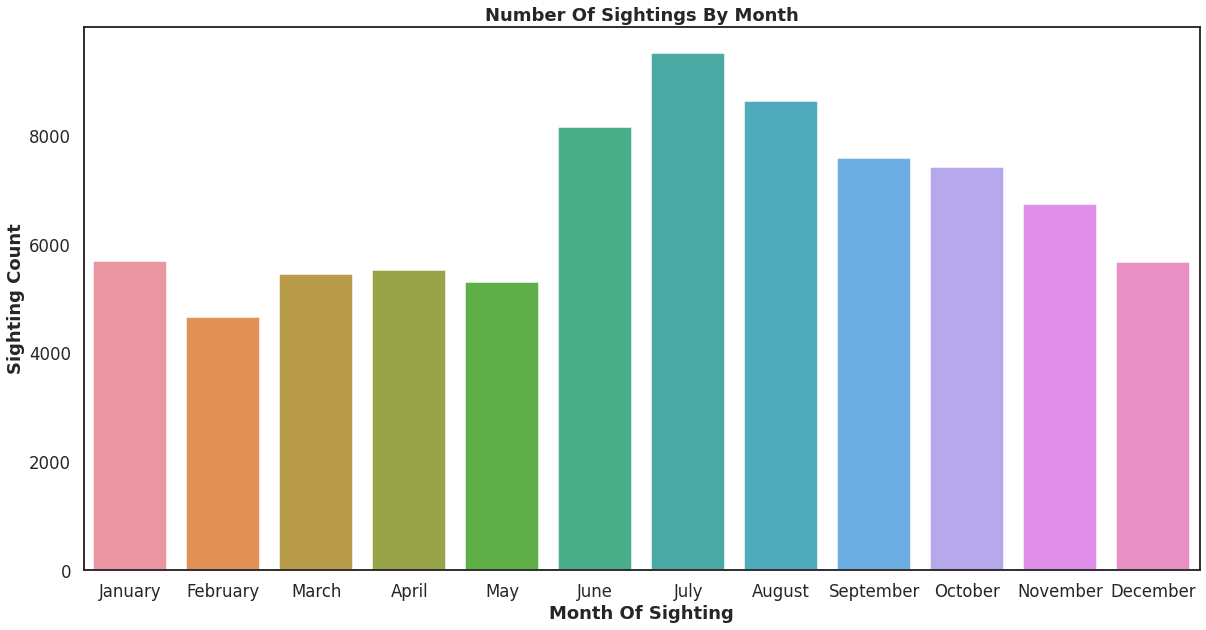

In [ ]:
# Nombre de sightings pqr mois
plt.figure(figsize=(20,10))
sns.countplot(data=df.sort_values(by='month'),x='month_name')
plt.xlabel('Month Of Sighting', fontweight='semibold')
plt.ylabel('Sighting Count', fontweight='semibold')
plt.title('Number Of Sightings By Month', fontweight='semibold')
plt.show()

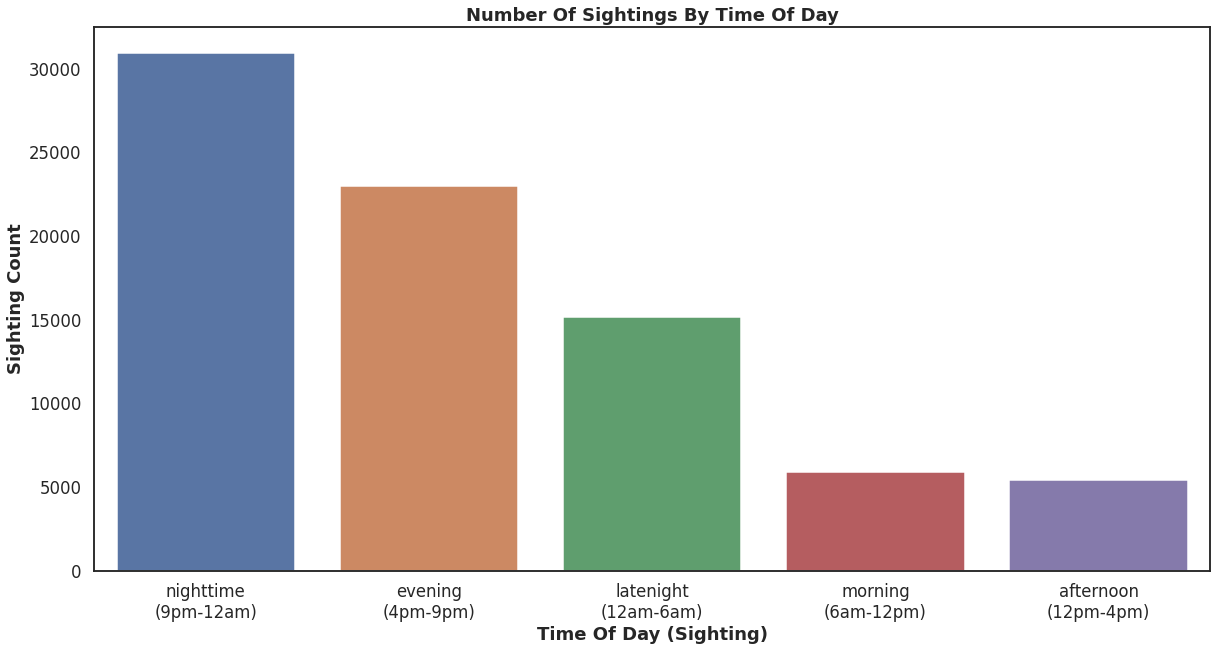

In [ ]:
# Nombre de sightings par le temps de jour
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='sighting_time', 
              order=df['sighting_time'].value_counts().index)
plt.xlabel('Time Of Day (Sighting)', fontweight='semibold')
plt.ylabel('Sighting Count', fontweight='semibold')
plt.title('Number Of Sightings By Time Of Day', fontweight='semibold')
plt.show()

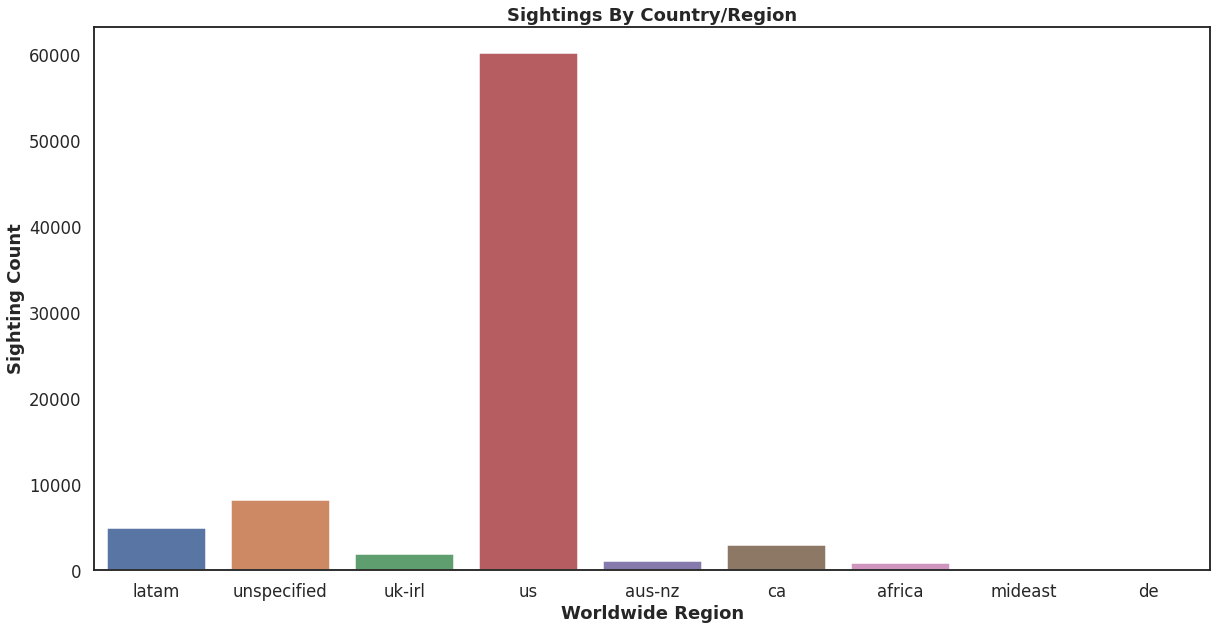

In [ ]:
# Nombre de sightings par région ou pays
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='country')
plt.xlabel('Worldwide Region', fontweight='semibold')
plt.ylabel('Sighting Count', fontweight='semibold')
plt.title('Sightings By Country/Region', fontweight='semibold')
plt.show()

In [ ]:
# Group By States With Over 1000 Sighting AKA Hotspots
by_state = (df
    .groupby('state')
    .filter(lambda x: len(x) > 1000))

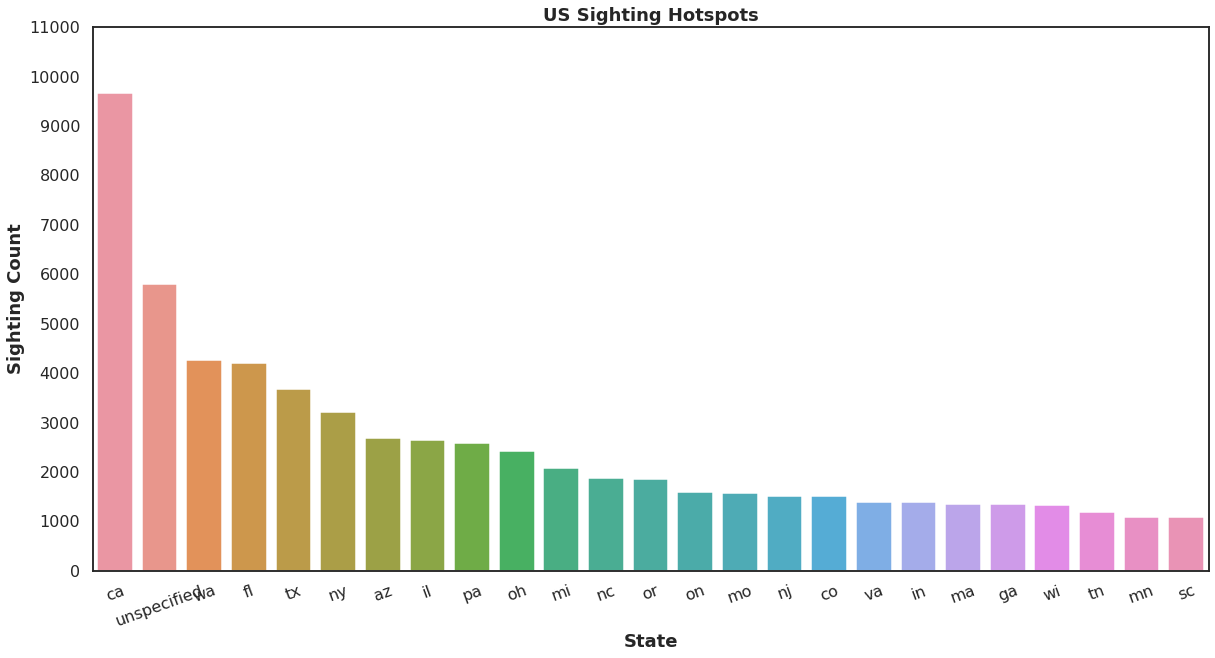

In [ ]:
# Nombre de sightings aux Etats-Unis par state
plt.figure(figsize=(20,10))
sns.countplot(x = 'state',
              data = by_state,
              order = by_state['state'].value_counts().index)

plt.xticks(size=16, rotation=90)
plt.yticks(range(0,12000,1000),size=16, rotation=0)
plt.xlabel('State', fontweight='semibold')
plt.ylabel('Sighting Count', fontweight='semibold')
plt.title('US Sighting Hotspots', fontweight='semibold')
plt.xticks(rotation=20)
plt.show()

In [ ]:
# Grouping Cities With Over 200 Sighting
by_city = (df
    .groupby('city')
    .filter(lambda x: len(x) > 200))

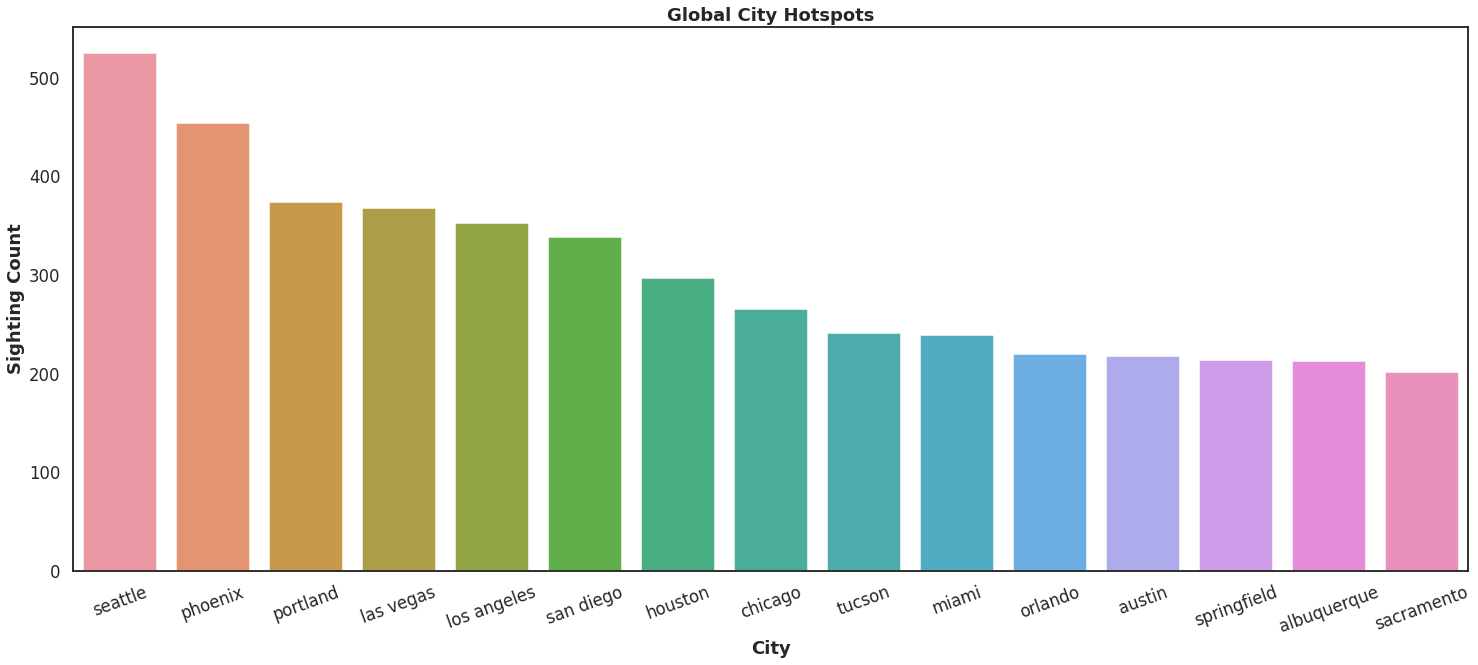

In [ ]:
# Nombre de l’observation par ville
plt.figure(figsize=(25,10))
sns.countplot(x = 'city',
              data = by_city,
              order = by_city['city'].value_counts().index)
plt.xlabel('City', fontweight='semibold')
plt.ylabel('Sighting Count', fontweight='semibold')
plt.title('Global City Hotspots', fontweight='semibold')
plt.xticks(rotation=20)
plt.show()

In [ ]:
# Group by Count Transforming Data To Heatmap Compatable Count Of Shapes Per Cities
shape_by_city = (df
    .groupby('city')
    .filter(lambda x: len(x) > 100) 
    .groupby(['shape', 'city'])
    .size()
    .unstack())

# Make The Shapes More Legible
shape_by_city.index = shape_by_city.index.str.upper()

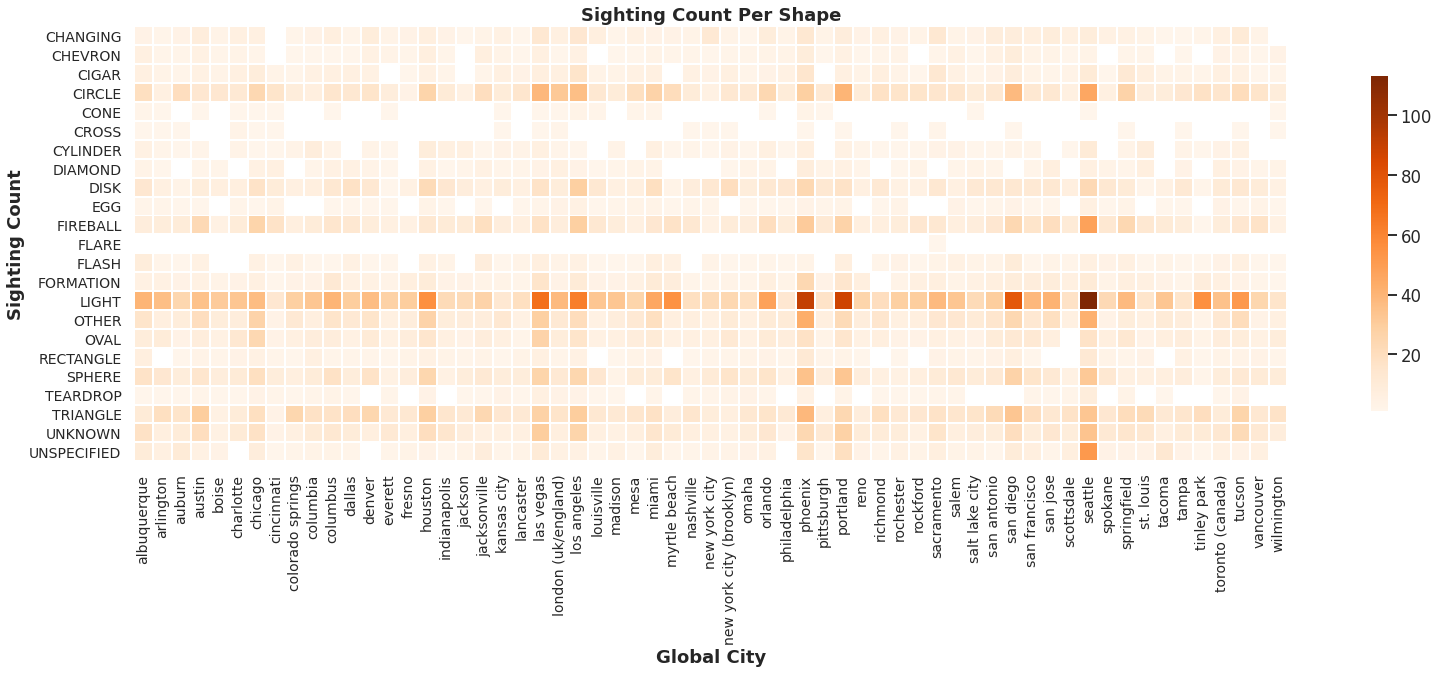

In [ ]:
# Des formes UFO selon la localisation
plt.figure(figsize=(30,8))
heat = sns.heatmap(
        shape_by_city,
        square=True,
        cbar_kws= {'fraction': 0.01},
        cmap='Oranges',
        linewidth=1
)
heat.set_xticklabels(heat.get_xticklabels(), fontsize=14, rotation=90,horizontalalignment='center')
heat.set_yticklabels(heat.get_yticklabels(), fontsize=14, rotation=0)
plt.xlabel('Global City', fontweight='semibold')
plt.ylabel('Sighting Count', fontweight='semibold')
plt.title('Sighting Count Per Shape', fontweight='semibold')
plt.show()

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
     | 149.0MB 1.3MB/s
     |████████████████████████████████| 6.5MB 16.6MB/s 
     |████████████████████████████████| 225kB 39.9MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759563 sha256=62abc709d94d360a01f503a346cd0e9c9d80a379f7c3cf3ced733a05136cc804
  Stored in directory: /tmp/pip-ephem-wheel-cache-e9quyxo3/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl

In [ ]:
from mpl_toolkits.basemap import Basemap

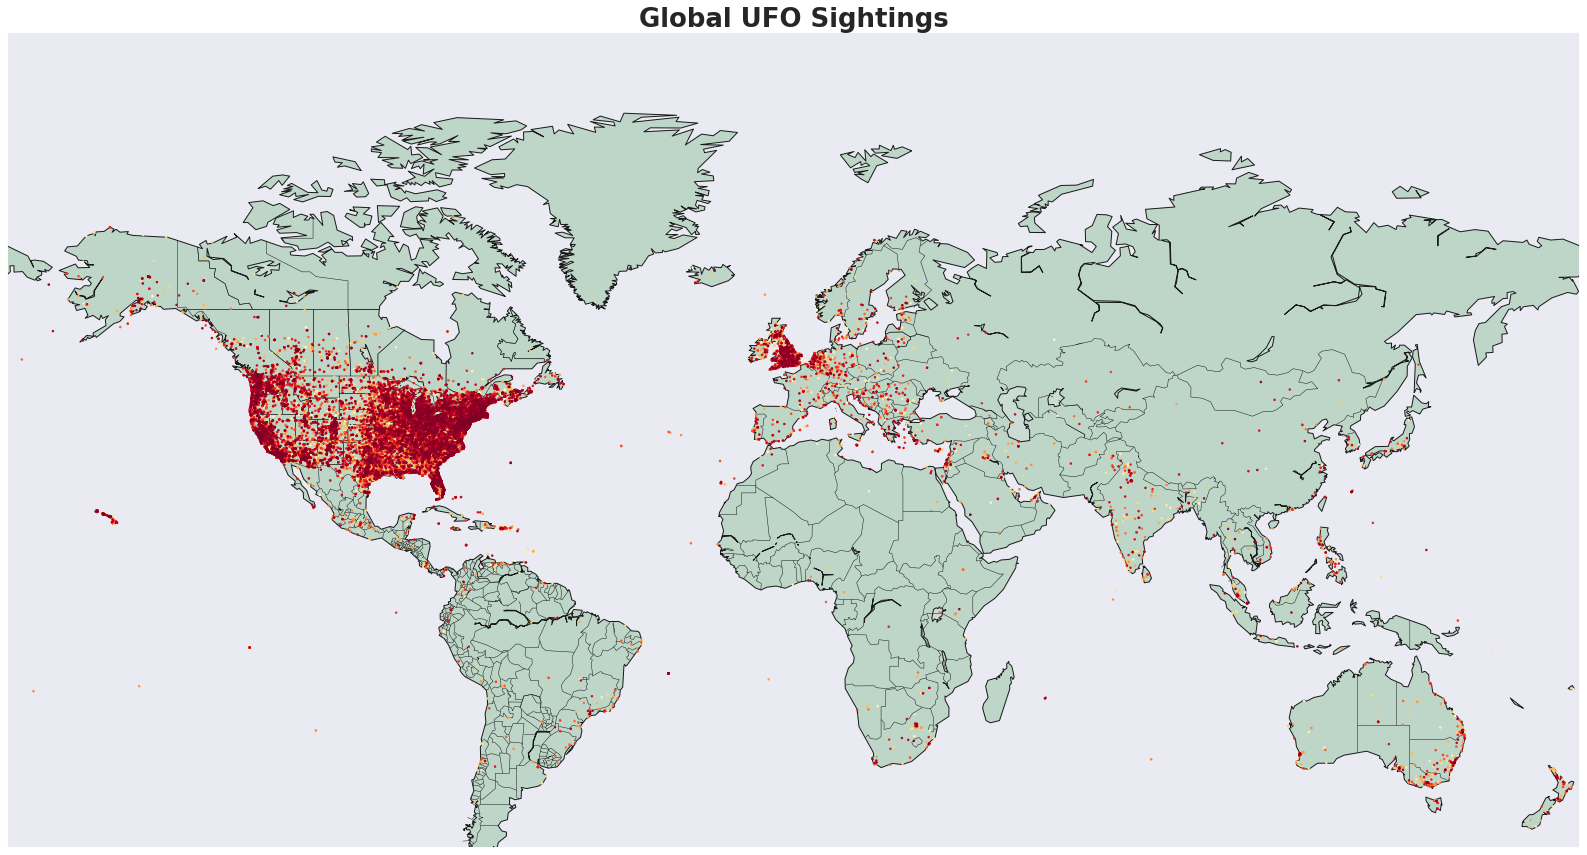

In [ ]:
# En utilisant de latitude et lontitude pour afficher une carte globale

plt.figure(figsize=(30,15))
m = Basemap(projection='mill',
           llcrnrlat = -50,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawstates()
m.drawcountries()
m.drawcoastlines()

lat, long = df['latitude'].tolist(), df['longtitude'].tolist()

t = np.arange(80332)

m.scatter(long, lat, marker = 'o', c=t, cmap='YlOrRd', s=1, zorder=10, latlon=True)
m.fillcontinents(color='g', alpha =0.3)

plt.title("Global UFO Sightings", fontsize=26, fontweight='semibold')

plt.show()

In [ ]:
# SUpprimer les colonnes qui ont encodé ou répété 
no_nan_df = df.drop(['datetime', 'seconds', 'state', 'city', 'minutes','country', 'shape','comments',
              'date added','month_name', 'added_region','sighting_time','sighting_date'],axis=1)

In [ ]:
# Check For High Variance 
no_nan_df.var()

latitude                109.613283
longtitude             1575.868057
time                 587248.727818
minutes_log               4.739148
month                    10.464336
year                    108.718820
country_enc               3.251296
state_enc               431.879194
city_enc                724.379841
sighting_time_enc         1.198221
changed                   0.000012
changing                  0.023827
chevron                   0.011711
cigar                     0.024951
circle                    0.085739
cone                      0.003918
crescent                  0.000025
cross                     0.002892
cylinder                  0.015716
delta                     0.000087
diamond                   0.014449
disk                      0.060683
dome                      0.000012
egg                       0.009359
fireball                  0.071308
flare                     0.000012
flash                     0.016258
formation                 0.029650
hexagon             

In [ ]:
minutes_agg = df['minutes_log'].agg([min, np.median, np.mean, max, np.std])#aggregate
minutes_agg

min       -4.094345
median     1.098612
mean       0.854611
max       14.304460
std        2.176958
Name: minutes_log, dtype: float64

In [ ]:
np.where(np.isnan(no_nan_df['latitude']))

(array([43782]),)

In [ ]:
no_nan_df.dropna(inplace=True)

In [ ]:
np.where(np.isnan(no_nan_df['latitude']))

(array([], dtype=int64),)

In [ ]:
np.where(np.isnan(no_nan_df['longtitude']))

(array([], dtype=int64),)

In [ ]:
np.where(np.isnan(no_nan_df['country_enc']))

(array([], dtype=int64),)

In [ ]:
# Creating Numeric X, y Vairables
X, y = no_nan_df.drop(
    ['country_enc','latitude','longtitude'],
    axis=1),no_nan_df['country_enc']

# Split the X and y sets using train_test_split, setting stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123)

print(X_train.shape)
print(X_test.shape)

(49150, 37)
(16384, 37)


KNN


In [ ]:
# Utiliser la méthode "GridSearchCV" pour faire une validation croisée du paramètre k d’un kNN (le nombre de plus proches voisins)
# sur le jeu d’entraînement 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection


# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}


# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv = 5,
    scoring = score
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# Afficher le(s) hyperparamètre(s) optimaux
print(clf.best_params_)

{'n_neighbors': 13}


In [ ]:
# Afficher les performances correspondantes (ici l'accuracy)
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.781 (+/-0.003) for {'n_neighbors': 3}
accuracy = 0.794 (+/-0.003) for {'n_neighbors': 5}
accuracy = 0.803 (+/-0.004) for {'n_neighbors': 7}
accuracy = 0.805 (+/-0.003) for {'n_neighbors': 9}
accuracy = 0.807 (+/-0.003) for {'n_neighbors': 11}
accuracy = 0.807 (+/-0.001) for {'n_neighbors': 13}
accuracy = 0.806 (+/-0.003) for {'n_neighbors': 15}
accuracy = 0.805 (+/-0.001) for {'n_neighbors': 17}
accuracy = 0.804 (+/-0.002) for {'n_neighbors': 19}
accuracy = 0.803 (+/-0.002) for {'n_neighbors': 21}


In [ ]:
# Afficher les performances (précision and rapel) par cross-validation du modèle avec les paramètres selectionnées
from sklearn.model_selection import cross_validate
scores_clf = cross_validate(clf, X_train, y_train, cv=3, scoring=('accuracy','precision_micro'))

In [ ]:
print(scores_clf)

{'fit_time': array([47.41588902, 46.18797159, 49.01122332]), 'score_time': array([1.99403119, 2.015172  , 2.17567277]), 'test_accuracy': array([0.80145264, 0.8078496 , 0.8004639 ]), 'test_precision_micro': array([0.80145264, 0.8078496 , 0.8004639 ])}


In [ ]:
scores_clf['test_accuracy'].mean()

0.8032553774718362

Régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores_logmodel = cross_validate(logmodel, X_train, y_train,cv=3, scoring=('accuracy','precision_micro'))
print(scores_logmodel)

{'fit_time': array([188.26275682, 330.38737011, 239.45194626]), 'score_time': array([0.01684046, 0.01645803, 0.01707554]), 'test_accuracy': array([0.79223633, 0.79344442, 0.79313923]), 'test_precision_micro': array([0.79223633, 0.79344442, 0.79313923])}


In [ ]:
scores_logmodel['test_accuracy'].mean()

0.7929399939708208

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
 'n_estimators': [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)],
 'max_depth': [int(x) for x in np.linspace(20, 100, num = 5)]
 }
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
scores_rf_random = cross_validate(rf_random, X_train, y_train, cv=3, scoring=('accuracy','precision_micro'))
print(scores_rf_random)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.8min finished


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.8min finished


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.8min finished


{'fit_time': array([417.07845616, 417.23517513, 417.18550158]), 'score_time': array([1.1296947 , 1.22618628, 1.19319272]), 'test_accuracy': array([0.86132812, 0.86266252, 0.86370018]), 'test_precision_micro': array([0.86132812, 0.86266252, 0.86370018])}


In [ ]:
scores_rf_random['test_accuracy'].mean()

0.8625636060118212

In [ ]:
model = clf

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[8 8 4 ... 2 8 2]


In [ ]:
# Rapport de classification
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.41      0.45       191
           1       0.77      0.58      0.66       231
           2       0.75      0.99      0.85       569
           3       0.00      0.00      0.00        22
           4       0.58      0.33      0.42      1049
           5       0.00      0.00      0.00        10
           6       0.27      0.12      0.17       392
           7       0.46      0.08      0.14      1668
           8       0.84      0.97      0.90     12252

    accuracy                           0.81     16384
   macro avg       0.46      0.39      0.40     16384
weighted avg       0.76      0.81      0.76     16384



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
